In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.0.5'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4E2D-C9E2

 Directory of C:\Users\AJ Adams\Documents\Machine Learning\PolyReg

12/26/2020  12:59 AM    <DIR>          .
12/26/2020  12:59 AM    <DIR>          ..
12/26/2020  12:59 AM    <DIR>          .ipynb_checkpoints
09/23/2020  05:14 PM            93,119 PolyReg.ipynb
12/26/2020  12:58 AM               177 README.md
09/10/2020  10:48 PM         1,772,178 WHO-COVID-19-global-data.csv
               3 File(s)      1,865,474 bytes
               3 Dir(s)  276,104,314,880 bytes free


In [4]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')

In [5]:
df #check that it read the csv

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
40292,2020-09-04,ZW,Zimbabwe,AFRO,40,6678,0,206
40293,2020-09-05,ZW,Zimbabwe,AFRO,159,6837,0,206
40294,2020-09-06,ZW,Zimbabwe,AFRO,0,6837,0,206
40295,2020-09-07,ZW,Zimbabwe,AFRO,0,6837,0,206


In [6]:
df2 = df.set_index(' Country') #added space at beginning
df2.loc['United States of America',:] #this contains all the United States Cases

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-01-20,US,AMRO,5,5,0,0
United States of America,2020-01-21,US,AMRO,0,5,0,0
United States of America,2020-01-22,US,AMRO,0,5,0,0
United States of America,2020-01-23,US,AMRO,0,5,0,0
United States of America,2020-01-24,US,AMRO,1,6,0,0
...,...,...,...,...,...,...,...
United States of America,2020-09-04,US,AMRO,39402,6050444,1004,184614
United States of America,2020-09-05,US,AMRO,44563,6095007,1073,185687
United States of America,2020-09-06,US,AMRO,49131,6144138,976,186663


In [7]:
df3 = df2.loc['United States of America',:]
df4 = df3[['Date_reported',' Cumulative_cases']]

In [8]:
df4

,Date_reported,Cumulative_cases
Country,,
United States of America,2020-01-20,5
United States of America,2020-01-21,5
United States of America,2020-01-22,5
United States of America,2020-01-23,5
United States of America,2020-01-24,6
...,...,...
United States of America,2020-09-04,6050444
United States of America,2020-09-05,6095007
United States of America,2020-09-06,6144138


In [9]:
from datetime import date
d0 = date(2020, 1, 20)
d1 = date(2020, 9, 8)
delta = d1 - d0
print(delta)

232 days, 0:00:00


In [10]:
days = list(range(233))
df4.insert(2,'Days', days)

In [11]:
df4

,Date_reported,Cumulative_cases,Days
Country,,,
United States of America,2020-01-20,5,0
United States of America,2020-01-21,5,1
United States of America,2020-01-22,5,2
United States of America,2020-01-23,5,3
United States of America,2020-01-24,6,4
...,...,...,...
United States of America,2020-09-04,6050444,228
United States of America,2020-09-05,6095007,229
United States of America,2020-09-06,6144138,230


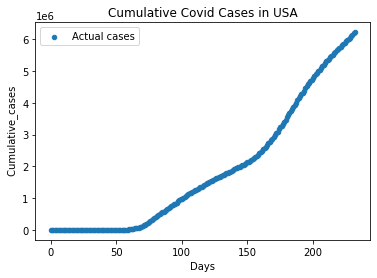

In [12]:
import matplotlib.pyplot as plt

x = 'Days'
y = ' Cumulative_cases'
#plt = 
df4.plot(x, y, title = 'Cumulative Covid Cases in USA', kind = 'scatter') #plots scatter plot of cumulative cases starting on January 20
plt.legend(['Actual cases'])

In [13]:
import numpy as np
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

In [14]:
M = 2
w, y, error = PolynomialRegression(df4[x],df4[y],M)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

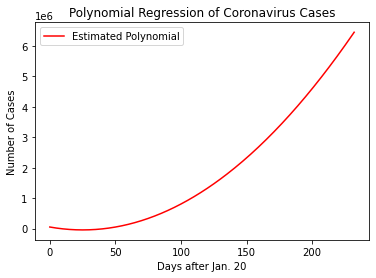

In [15]:
pl2 = plt.plot(df4[x],y, 'r')
plt.legend(['Estimated Polynomial'])
plt.xlabel('Days after Jan. 20')
plt.ylabel('Number of Cases')
plt.title('Polynomial Regression of Coronavirus Cases')
plt.figure

In [16]:
def PolynomialRegression_test(x, M, w):
    X = np.array([x**m for m in range(M+1)]).T
    y = X@w
    return y

In [17]:
last30 = df4.tail(30) #get df with last 30 days

In [18]:
last30

,Date_reported,Cumulative_cases,Days
Country,,,
United States of America,2020-08-10,4951851,203
United States of America,2020-08-11,4999815,204
United States of America,2020-08-12,5039709,205
United States of America,2020-08-13,5094500,206
United States of America,2020-08-14,5150407,207
United States of America,2020-08-15,5203206,208
United States of America,2020-08-16,5258565,209
United States of America,2020-08-17,5312940,210
United States of America,2020-08-18,5354013,211


In [19]:
M = 2
x = 'Days'
y = ' Cumulative_cases'
a,b,c = PolynomialRegression(last30[x], last30[y], M)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

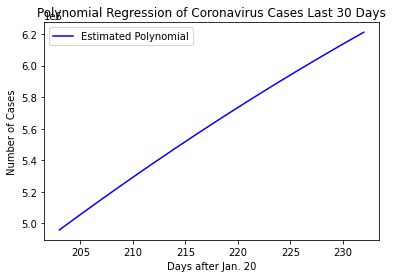

In [20]:
pl3 = plt.plot(last30[x],b, 'b') #estimated last 30 days
plt.legend(['Estimated Polynomial'])
plt.xlabel('Days after Jan. 20')
plt.ylabel('Number of Cases')
plt.title('Polynomial Regression of Coronavirus Cases Last 30 Days')
plt.figure

In [21]:
sept9 = PolynomialRegression_test(233, M, a)

In [22]:
print(f'The estimated number of cases for September 9th is {sept9}')

The estimated number of cases for September 9th is 6248689.788643196


In [23]:
sept10 = PolynomialRegression_test(234, M, a)

In [24]:
print(f'The estimated number of cases for September 10th is {sept10}')

The estimated number of cases for September 10th is 6285418.554418124
